In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [5]:
#import data - give appropriate path
conversations_review = pd.read_csv("conversations_review.csv")
conversations_message = pd.read_csv("conversations_message.csv")
conversations_conversation_pets = pd.read_csv("conversations_conversation_pets.csv")
conversations_conversation = pd.read_csv("conversations_conversation.csv")
services_service = pd.read_csv("services_service.csv")
pets_pet = pd.read_csv("pets_pet.csv")
people_person = pd.read_csv("people_person.csv")
people_testsegmentation = pd.read_csv("people_testsegmentation.csv")


In [6]:
#overview of data
conversations_review.head(3)

,id,content,stars,conversation_id,reviewer_id
0,73828,Curae donec quam quisque quam.,4,208294,2617
1,73829,Risus donec scelerisque ultrices commodo nulla.,5,208296,64414
2,73830,Morbi etiam neque ornare curae senectus nunc b...,5,208298,3312


In [7]:
conversations_message.head(3)

,id,sent,content,conversation_id,sender_id
0,3229944,2017-05-25 17:06:35.796792,Morbi fames conubia proin orci egestas.,208294,64416
1,3229945,2017-05-31 16:18:00.550178,Massa purus nascetur adipiscing porttitor lore...,208294,2617
2,3229946,2017-06-01 13:02:01.707328,Porta lacus ornare morbi lacinia vel.,208294,2617


In [8]:
conversations_conversation_pets.head(3)

,id,conversation_id,pet_id
0,1,208294,296577
1,2,208294,296578
2,3,208295,296576


In [9]:
conversations_conversation.head(3)

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,208294,2017-06-06,2017-06-09,3,2017-05-25 17:06:35.796792,102,NaN,64416,81642,2017-05-26 21:02:09.499404,NaN
1,208295,2017-07-16,2017-07-25,9,2017-07-07 06:07:08.053227,324,NaN,64415,79559,NaN,NaN
2,208296,2017-06-06,2017-06-12,6,2017-05-26 17:47:38.312937,102,NaN,64414,91348,2017-05-29 01:27:14.256611,NaN


In [10]:
services_service.head(3)

,id,service_type,cancellation_policy,can_provide_oral_medication,can_provide_injected_medication,senior_dog_experience,special_needs_experience,takes_small_dogs,takes_medium_dogs,takes_large_dogs,takes_puppies,max_dogs,provider_id,fee,price,added
0,77127,boarding,strict,1,0,1,1,0,1,0,0,2,1,0.15,35,2015-07-12 15:13:16.673652
1,77128,boarding,strict,1,0,1,0,1,0,0,1,2,2,0.15,35,2015-07-12 13:44:21.949482
2,77129,dog-walking,flexible,1,0,1,0,1,1,0,1,6,3,0.15,24,2015-07-12 11:36:06.992714


In [11]:
pets_pet.head(3)

,id,name,description,gender,weight,birthday,plays_cats,plays_children,plays_dogs,spayed_neutered,house_trained,size,owner_id
0,219067,Dorla,Etiam risus.,f,77,2015-04-20,0,1,1,1,1,large,12601
1,219068,Magan,Massa ipsum felis.,f,85,2016-01-03,0,0,1,0,1,large,12601
2,219069,Concepcion,Lacus donec potenti cubilia primis nam nibh.,f,9,2013-06-30,0,1,1,1,1,small,12602


In [12]:
people_person.head(3)

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender
0,1,Meaghan,Lapete,meaghan.lapete820@aol.com,NaN,2015-07-12 15:13:16.673652,https://placekitten.com/360/208,0.0,f
1,2,Aracelis,Luhr,aracelis.luhr844@rover.com,NaN,2015-07-12 13:44:21.949482,https://placekitten.com/392/227,0.0,f
2,3,Vernita,Amodei,vernita.amodei542@rover.com,NaN,2015-07-12 11:36:06.992714,https://placekitten.com/275/300,0.0,f


In [13]:
people_testsegmentation.head(3)

,id,test_name,test_group,added,person_id
0,61425,Email Test,holdout,2015-07-12 15:13:16.673652,1
1,61426,Email Test,holdout,2015-07-12 13:44:21.949482,2
2,61427,Email Test,variant,2015-07-12 11:36:06.992714,3


In [14]:
#I. Exploring the Database.

#a
users_signed = people_person.id.count()
print('Number of users signed up: %d \n' %users_signed)

#b
users_before_2017 = len(people_person[people_person['date_joined']<'2017-01-12'])
print('Number of users signed up prior to 2017-01-12 : %d \n' %users_before_2017)

#c
users_adding_pets = len(pets_pet.owner_id.unique())
user_register_percent = users_adding_pets*100/users_signed
print('Percentage of users who have added pet : %.2f \n' %(user_register_percent))

#d
user_pet_average = len(pets_pet)/users_adding_pets
print('Each user on an average have added %f pets \n' %(user_pet_average))

#e
percent_pets_play_cats = len(pets_pet[pets_pet.plays_cats==1])*100 /len(pets_pet.id)
print('Percentage of pets play well with cat: %.2f \n' %(percent_pets_play_cats))


Number of users signed up: 64416 

Number of users signed up prior to 2017-01-12 : 35500 

Percentage of users who have added pet : 80.44 

Each user on an average have added 1.495909 pets 

Percentage of pets play well with cat: 24.78 



In [15]:
#II. Conversations and Bookings

#a. possible services and the average price per unit for each service type.

unique_services = services_service.service_type.unique()
print('Possible services are:')
for _ in unique_services:
    print(_)
    
df1 = pd.merge(services_service,conversations_conversation,left_on = 'id',right_on = 'service_id', how = 'right')
service =df1.groupby('service_type')
n1 = service['price','units'].aggregate(np.sum)
n1['price_per_unit'] = n1.price / n1.units
print('\nThe possible services and the average price per unit for each service type are:',n1['price_per_unit'])

#b
print('\nNumber of requests per each service: ',service['requester_id'].count())
booking_rate = 100*service['booked_at'].count()/service['requester_id'].count()
print('\nbooking rate is per each service:',booking_rate)

#c
cancellation_rate = 100*service['cancelled_at'].count()/service['requester_id'].count()
print('\ncancellation rate is per each service:',cancellation_rate)

#d
Not_cancelled_df = conversations_conversation[pd.isnull(conversations_conversation.cancelled_at)]
reviews_without_cancellation = conversations_review[conversations_review['conversation_id'].isin(Not_cancelled_df.id)]
owner_reviews = reviews_without_cancellation[~reviews_without_cancellation['reviewer_id'].isin(services_service.provider_id)]
owner_review_count = len(owner_reviews)
service_provider_review_count = len(reviews_without_cancellation) - owner_review_count
print('\nFor uncancelled bookings,the reviews by owner or provider are:',owner_review_count,'and',service_provider_review_count)

Possible services are:
boarding
dog-walking
day-care

The possible services and the average price per unit for each service type are: service_type
boarding       7.267138
day-care       6.233467
dog-walking    5.846999
Name: price_per_unit, dtype: float64

Number of requests per each service:  service_type
boarding       26665
day-care       26362
dog-walking    26716
Name: requester_id, dtype: int64

booking rate is per each service: service_type
boarding       40.735046
day-care       35.721872
dog-walking    47.952538
dtype: float64

cancellation rate is per each service: service_type
boarding       3.941496
day-care       3.486078
dog-walking    4.559066
dtype: float64

For uncancelled bookings,the reviews by owner or provider are: 22493 and 6043


In [16]:
# III. Recent Daily Booking Rate

conversations_conversation["start_date"] = pd.to_datetime(conversations_conversation['start_date'])
date_group         = conversations_conversation.groupby(pd.Grouper(key ='start_date',freq='90D',sort=False))
booked_count       = date_group['booked_at'].count()
conversation_count = date_group['start_date'].count()
booking_percent_90days = booked_count/conversation_count

#print('daily booking rate for each of the 90 days prior to the snapshot is: ',booking_percent_90days)
df1 = pd.DataFrame(booking_percent_90days)
df1.columns= ['booking rate']
df1.reset_index()

,start_date,booking rate
0,2015-07-27,0.397759
1,2015-10-25,0.389668
2,2016-01-23,0.401719
3,2016-04-22,0.412638
4,2016-07-21,0.416495
5,2016-10-19,0.405072
6,2017-01-17,0.410145
7,2017-04-17,0.441242
8,2017-07-16,0.257566


In [17]:
#IV. Analyzing Take Rate

owner_fee_percent = 0.05
service_fee_percent = 0.15

conversations_conversation['start_date'] = pd.to_datetime(conversations_conversation['start_date'])
monthly_groupby = conversations_conversation.groupby(pd.Grouper(key ='start_date',freq='M'))
billings_per_month = monthly_groupby['booking_total'].agg(np.sum)

gross_billings_per_month = (1+owner_fee_percent)*billings_per_month
net_revenue= (owner_fee_percent+service_fee_percent)*billings_per_month
monthly_revenues = pd.concat([gross_billings_per_month, net_revenue], axis=1)
monthly_revenues.columns = ['gross_billings_per_month','net_revenue']

monthly_revenues['take_rate'] = monthly_revenues['net_revenue']/monthly_revenues['gross_billings_per_month']
print('In each month, the gross billings,net revenue and take rate are:\n',monthly_revenues)

In each month, the gross billings,net revenue and take rate are:
             gross_billings_per_month  net_revenue  take_rate
start_date                                                  
2015-07-31                    727.65        138.6   0.190476
2015-08-31                  25586.40       4873.6   0.190476
2015-09-30                  44556.75       8487.0   0.190476
2015-10-31                  85320.90      16251.6   0.190476
2015-11-30                 125624.10      23928.4   0.190476
2015-12-31                 173272.05      33004.2   0.190476
2016-01-31                 210090.30      40017.2   0.190476
2016-02-29                 239474.55      45614.2   0.190476
2016-03-31                 317542.05      60484.2   0.190476
2016-04-30                 381205.65      72610.6   0.190476
2016-05-31                 438964.05      83612.2   0.190476
2016-06-30                 489737.85      93283.4   0.190476
2016-07-31                 556032.75     105911.0   0.190476
2016-08-31         

In [18]:
#V. New Conversation Flow

ab_test = pd.merge(people_testsegmentation,conversations_conversation,how='inner',
                   left_on ='person_id',right_on = 'requester_id')
ab = ab_test.groupby('test_group')
ab_booking_rate = ab['booked_at','test_name'].count()
ab_booking_rate = ab_booking_rate['booked_at'] / ab_booking_rate['test_name']
ab_booking_rate

test_group
holdout    0.409986
variant    0.431410
dtype: float64

In [59]:
#VI. Search Engine Marketing
import warnings
warnings.filterwarnings('ignore')

search_engine = people_person[people_person['channel'] == 'Google']
users_joined_after_ads = len(search_engine[search_engine['date_joined']>'2017-04-12'])
print('Number of users acquired via google advertising since 2017-04-12 are:',users_joined_after_ads)
print('Average cost per account is %d dollars' %(210285/users_joined_after_ads))

search_engine['date_joined'] = pd.to_datetime(search_engine['date_joined'])
users_joined_before_ads = search_engine[search_engine['date_joined']<'2017-04-12']
users_joined_before_object = users_joined_before_ads.groupby(pd.Grouper(key ='date_joined',freq='D'))
users_joined_before = users_joined_before_object['date_joined'].count()
users_joined_before = pd.DataFrame({'date':users_joined_before.index, 'count':users_joined_before.values})
len_uj_b = len(users_joined_before.index)

Number of users acquired via google advertising since 2017-04-12 are: 4673
Average cost per account is 45 dollars


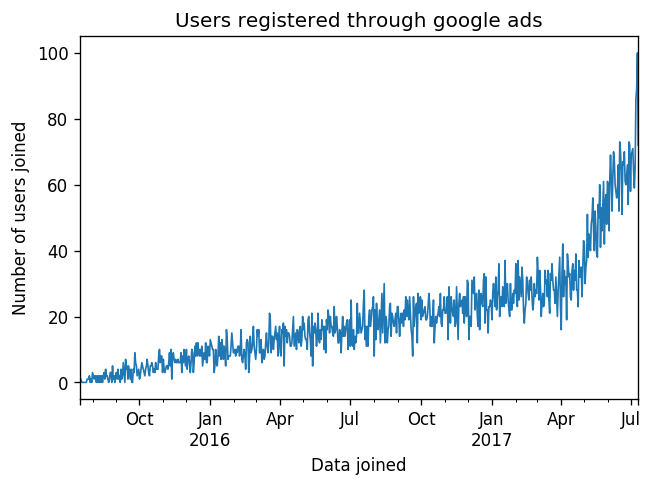

In [60]:
#plot image
users_joined_object = search_engine.groupby(pd.Grouper(key ='date_joined',freq='D'))
users_joined = users_joined_object['date_joined'].count()

users_joined.plot(linewidth=1)
plt.rcParams['figure.dpi']= 120
plt.title('Users registered through google ads')
plt.xlabel('Data joined')
plt.ylabel('Number of users joined')

In [58]:
from sklearn.linear_model import LinearRegression

#data prep
search_engine_1 = people_person[people_person['channel'] == 'Google']
search_engine_1['date_joined'] = pd.to_datetime(search_engine_1['date_joined'])
uj_object = search_engine_1.groupby(pd.Grouper(key ='date_joined',freq='D'))
uj = uj_object['date_joined'].count()
uj_t = pd.DataFrame({'date':uj.index, 'count':uj.values})
uj_t['row_numb'] = uj_t.index
uj_t['row_numb'].count()
train_data = uj_t[:len_uj_b]
test_data = uj_t[len_uj_b:]

#train data
x_train = train_data['row_numb'].values
x_train = x_train[:, np.newaxis]
y_train = train_data['count'].values
y_train = y_train[:,np.newaxis]

regressor = LinearRegression()
regressor.fit(x_train,y_train)

#test data
x_test = test_data['row_numb'].values
x_test = x_test[:, np.newaxis]
y_test = test_data['count'].values
y_test = y_test[:,np.newaxis]

#predictions
predictions = regressor.predict(x_test)
predicted_users_joined = int(round(predictions.sum()))

print('If the bidding stratergy has not changed, the expected users acquired will be',predicted_users_joined)


If the bidding stratergy has not changed, the expected users acquired will be 2873
